<a href="https://colab.research.google.com/github/NikoletaEm/datasps/blob/main/assignment_10_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 9**

In [10]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#plotly or other graphing library

In [3]:
# Load datasets here once and assign to variables iris and boston

iris = ds.load_iris()

 **Q1**

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [4]:
# Convert to DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Display first 5 rows
first_5_rows = df.head()

# Get target names
target_names = list(iris.target_names)

first_5_rows, target_names

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                5.1               3.5                1.4               0.2
 1                4.9               3.0                1.4               0.2
 2                4.7               3.2                1.3               0.2
 3                4.6               3.1                1.5               0.2
 4                5.0               3.6                1.4               0.2,
 [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')])

**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [9]:
# Prepare data and model
X, y = iris.data, iris.target
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Example new observations
new_observations = [[5.1, 3.5, 1.4, 0.2],
                    [6.2, 3.4, 5.4, 2.3]]

# Predict class indices
predictions = knn.predict(new_observations)

# Map to class names
predicted_names = [iris.target_names[p] for p in predictions]
predicted_names

[np.str_('setosa'), np.str_('virginica')]

**Q3**

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [27]:

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
def knn_accuracy(split=0.2, neighbors=5):
    # Load dataset
    iris = load_iris()
    X, y = iris.data, iris.target

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)

    # Fit kNN model
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_pred = knn.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Call the function and print result
print("Accuracy:", knn_accuracy(split=0.4, neighbors=3))

Accuracy: 0.9833333333333333


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

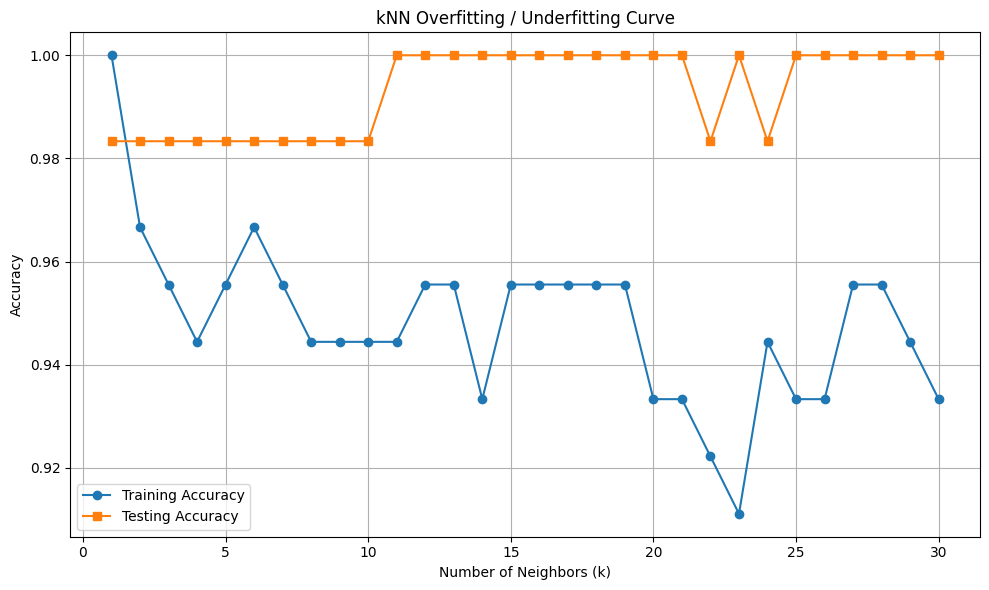

In [28]:
import matplotlib.pyplot as plt
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Store scores
train_scores = []
test_scores = []

# Evaluate k from 1 to 30
k_range = range(1, 31)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Store accuracy
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

# Plot the curves
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_scores, label='Training Accuracy', marker='o')
plt.plot(k_range, test_scores, label='Testing Accuracy', marker='s')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('kNN Overfitting / Underfitting Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()